# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1UIW1PaDxDjmTLLholL42BLD-xwSdfvPf?usp=sharing

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

In [ ]:
#Importing all the necessary libraries
import numpy as np
from torch.optim import Adam
from torch.autograd import Variable
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader 
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import pathlib
torch.manual_seed(1) 
from torchvision import datasets, transforms

In [ ]:
#Mounting the google drive to colab for the dataset
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#For resizing the images to (224x224) and converting to tensor and normalizing it
transformer = transforms.Compose([transforms.Resize((224,224)),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.5,0.5,0.5],
                                                       [0.5,0.5,0.5])])

In [ ]:
#Downloading the split-folders function to split the dataset into train, val and test sets
!pip install split-folders
import splitfolders

In [ ]:
#Path for training and personal testing datasets on colab
train_path = '/content/drive/MyDrive/Lab_3b_Gesture_Dataset'  

test_path = '/content/drive/MyDrive/FINAL TEST'  #The 27 holdout set of images


#Loading the holdout data and resizing and transforming  it to tensor
my_test_loader = torchvision.datasets.ImageFolder(test_path,transform=transformer)


**SPLITING THE DATASET:**

The data was split into 60% training and 20% for validation and testing this was done so that there would be enough images to be used for training (to prevent underfitting) the model and have enough data for validation to evaluate the performance and check for overfitting and also having a good amount of testing data to check for generalization as well.

In [ ]:
#Spliting the dataset into 60% training and 20% for validation and testing and storing it to google drive using seed for reproduceability
splitfolders.ratio(train_path, output="C:/Users/anchi/Desktop/MIE1517/ASS2/output", seed=1337, ratio=(.6, 0.2,0.2)) 


Copying files: 2431 files [00:03, 733.07 files/s]


In [ ]:
#Loading the training, validation and testing data and resizing and transforming it (colab path)
train_loader =torchvision.datasets.ImageFolder('/content/drive/MyDrive/output/train',transform=transformer)
test_loader = torchvision.datasets.ImageFolder('/content/drive/MyDrive/output/test',transform=transformer)
val_loader = torchvision.datasets.ImageFolder('/content/drive/MyDrive/output/val',transform=transformer)


In [ ]:
#This initialises DataLoader with the Dataset to help iterate through the Dataset to display the images below. 
# Shuffle will reshuffle the data at each epoch, this prevents the model from learning the order of training data.
train_loader1 = torch.utils.data.DataLoader(train_loader,batch_size=32,shuffle=True)
val_loader1 = torch.utils.data.DataLoader(val_loader,batch_size=32,shuffle=True)
test_loader1 = torch.utils.data.DataLoader(test_loader,batch_size=32,shuffle=True)
my_test_loader1 = torch.utils.data.DataLoader(my_test_loader,batch_size=1,shuffle=True)

In [ ]:
#To print the classes of the images which can be used in the final fc layer of the model  
root = pathlib.Path(train_path)
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])
classes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

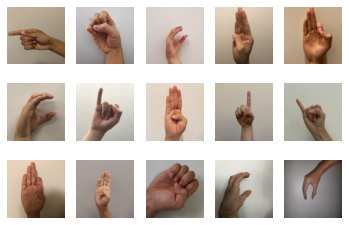

In [ ]:
# Displaying the sample of training images
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader1:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

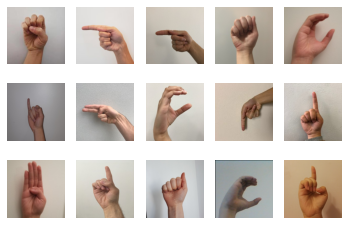

In [ ]:
# Displaying a sample of the validation data
import matplotlib.pyplot as plt

k = 0
for images, labels in val_loader1:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

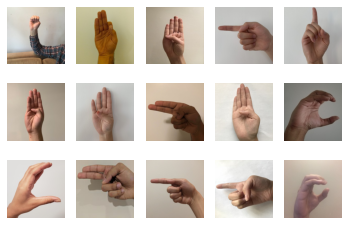

In [ ]:
# Displaying a sample of the testing data
import matplotlib.pyplot as plt

k = 0
for images, labels in test_loader1:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

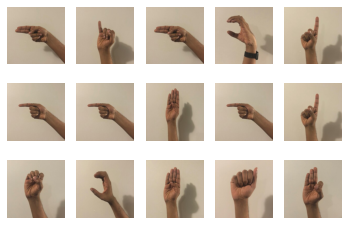

In [ ]:
#  Displaying a sample of the Holdout data
import matplotlib.pyplot as plt

k = 0
for images, labels in my_test_loader1:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part 2. Model Building and Sanity Checking [10 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

**MODEL ARCHIETECTURE:**

The model has 3 CNN layers along with 3 Maxpooling layers and followed by 3 fully connected layers. The 3 convolutional layers were selected as the model performed much better than having 2 layers. Each of these layers is separated with a max-pooling layer to downsample the images for faster computations, and 3 layers of FC were added to get better image classification, and as having a large number of layers is prone to overfitting, a dropout layer with 50% is added to the first fully connected layer. 

But for the best archietecture (Model1) the dropout layer is removed and the kernel size was changed for the 3rd layer to 4 as smaller kernel would capture the smaller details/pattern in the images. 

In [ ]:
# The archietecture of the model it has 3 CNN layers along with 3 Maxpool layers and 3 FC layers with a Dropout of 50% on the first FC layer

class GestureClassifier(nn.Module):
    def __init__(self):
        super(GestureClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 3) #in_channels, out_chanels, kernel_size
          #shape(222,222) after layer1 Conv
        self.pool = nn.MaxPool2d(2,2) #kernel_size, stride
          #shape(111,111) after first maxpool
        self.conv2 = nn.Conv2d(12, 20, 5) #in_channels, out_chanels, kernel_size
          #shape(107,107) after 2nd conv layer
          #shape(53,53) - after 2nd maxpool
        self.conv3 = nn.Conv2d(20, 32, 8) #in_channels, out_chanels, kernel_size
          #shape(46,46) after 3rd conv layer
          #shape(23,23) after 3rd maxpool
        self.fc1 = nn.Linear(32*23*23, 20) #Flatten the image in the first fc layer
        self.fc2 = nn.Linear(20, 12) #in_channel, out_channel
        self.fc3 = nn.Linear(12, len(classes)) #in_channel, out_channel = No. of classes
          #Dropout 50% to prevent overfitting
        self.dropout1 = nn.Dropout(0.5)

# The forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 32*23*23)
        x = F.relu(self.fc1(self.dropout1(x))) #Applying dropout to the 1st FC layer
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# The archietecture of the model it has 3 CNN layers along with 3 Maxpool layers and 3 FC layers without a Dropout of 50% on the first FC layer
# This is the best archietecture also the kernel size is changed to 5 for the 3rd conv layer
class GestureClassifier1(nn.Module):
    def __init__(self):
        super(GestureClassifier1, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 3) #in_channels, out_chanels, kernel_size
          #shape(222,222) after layer1 Conv
        self.pool = nn.MaxPool2d(2,2) #kernel_size, stride
          #shape(111,111) after first maxpool
        self.conv2 = nn.Conv2d(12, 24, 5) #in_channels, out_chanels, kernel_size
          #shape(107,107) after 2nd conv layer
          #shape(53,53) - after 2nd maxpool
        self.conv3 = nn.Conv2d(24, 32, 5) #in_channels, out_chanels, kernel_size
          #shape(50,50) after 3rd conv layer
          #shape(25,25) after 3rd maxpool
        self.fc1 = nn.Linear(32*24*24, 24) #Flatten the image in the first fc layer
        self.fc2 = nn.Linear(24, 14) #in_channel, out_channel
        self.fc3 = nn.Linear(14, len(classes)) #in_channel, out_channel = No. of classes


# The forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 32*24*24)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
use_cuda = True
# Checking for GPU and using it for training if available else use the CPU
model = GestureClassifier()
model1 = GestureClassifier1()
if use_cuda and torch.cuda.is_available():
    model.cuda() #initialize the gpu
    model1.cuda()

    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')


CUDA is available!  Training on GPU ...


### Part (b) Training Code - 4 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

**TRAINING:**

The training code takes all the hyperparameters needed to tweak the model and it uses Adam optimizer as SGD didn't perform well so Adam optimizer was used which also increased the computation speed compared to SGD. The CrossEntropy loss function is used as it is the best for multi-class classification. The training code also saves the model and optimizer parameters i.e. saves checkpoint for every 5 epochs.


In [ ]:
def save_checkpoint(state, filename='my_checkpoint.pth'):
    print('Saving checkpoint')
    torch.save(state, filename)
    
def load_checkpoint(checkpoint):
    print('Loading checkpoint')
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['state_dict'])

In [ ]:
# Training 
def train(model, data, test_data, batch_size, lr, num_epochs):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss() #Cross entropy loss for multiclass classification
    optimizer = optim.Adam(model.parameters(), lr=lr) # Adam optimizer for faster computations
    load_model = False

    iters, losses, train_acc, val_acc = [], [], [], []
    
    if load_model:
        load_checkpoint(torch.load('my_checkpoint.pth'))


    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            model.train() # Since the model has dropout need to use model.train() to activate dropout
            print('The epoch is:',epoch)
            print('The iteration is:',n)
            # Saving for every 5 epochs
            if epoch % 5 == 0:
                checkpoint = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                save_checkpoint(checkpoint)
                load_model = True
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            print('Done')

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, data, test_data, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, data, test_data, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
# Accuracy
def get_accuracy(model, train_data, test_data, train=False):
    if train:
        data = train_data
    else:
        data = test_data

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        model.eval() # Used to not use dropout when evaluating the model
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
# Calculating the Accuracy of the final test
def get_final_accuracy(model, test_data):

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(test_data, batch_size=64):
        model.eval() # Used to not use dropout when evaluating the model
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
# To split the holdout data to use for the sanity check. Spliting the data into 50% train and val set 
splitfolders.ratio(test_path, output="/content/drive/MyDrive/sanity", seed=1337, ratio=(0.5, 0.5)) 


Copying files: 27 files [00:00, 588.52 files/s]


In [ ]:
# Loading the split images and transforming it
sanity_test = torchvision.datasets.ImageFolder('/content/drive/MyDrive/sanity/train',transform=transformer) # Using train to test as it only contains 9 images
sanity_train = torchvision.datasets.ImageFolder('/content/drive/MyDrive/sanity/val',transform=transformer)# Using the val to train as it contains 18 images



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


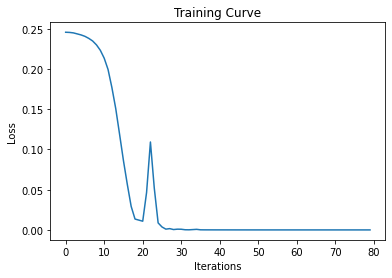

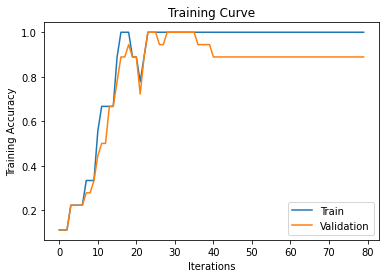

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.8888888888888888


In [ ]:
# The sanity check overfitting the model to a small dataset
train(model1, sanity_test, sanity_train, batch_size=9, lr = 0.01, num_epochs=80)

**SANITY CHECK:**

As we can see the model memorized/overfitted the small dataset around the 25 iteration indicating that the model and the training code works well and is capable of learning. So we can proceed with the large training dataset.

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

**HYPERPARAMETER TUNING:**

1) Learning Rate:

Adjusting the learning rate is a good way to fine tune the model especially if you feel like your model is stuck at a local minima but a high learning rate is bad as it could overshoot the local minima and never converge. So we have to randomly choose a learning rate and increase in a small steps to find the optimal value.

2) Batch size:

The batch size is an important parameter and it should not be too large even though it would speed up the training process it will lead to poor generalization. So it is best to start with a small batch size and increase it gradually based on the training and validation curves. Also smaller batch size though it might take longer to train there is a higher chance of convergence.

3) Number of Epochs:

Epoch refers to the number of times the entire datasets parameters are updated by gradient descent after calculating the loss function. Similar to batch size it can only be fine tuned by gradually increasing it from a small value based on the learning curve. 

4) Kernel size and Pooling size:

The kernel size doesn't affect the accuracy much but it is customory to start the first conv layer with 3x3 or 5x5 and also having a smaller kernel size is good as it will be able to capture small patterns in the images. When it comes to pooling it is used to reduce the size of the image and thus reducing the parameters and results in faster computation as well. Usually, a maxpooling size of 2x2 and stride 2 is used often. 


### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

The epoch is: 0
The iteration is: 0
Done
The epoch is: 0
The iteration is: 1
Done
The epoch is: 0
The iteration is: 2
Done
The epoch is: 0
The iteration is: 3
Done
The epoch is: 0
The iteration is: 4
Done
The epoch is: 0
The iteration is: 5
Done
The epoch is: 0
The iteration is: 6
Done
The epoch is: 0
The iteration is: 7
Done
The epoch is: 0
The iteration is: 8
Done
The epoch is: 0
The iteration is: 9
Done
The epoch is: 0
The iteration is: 10
Done
The epoch is: 0
The iteration is: 11
Done
The epoch is: 0
The iteration is: 12
Done
The epoch is: 1
The iteration is: 13
Done
The epoch is: 1
The iteration is: 14
Done
The epoch is: 1
The iteration is: 15
Done
The epoch is: 1
The iteration is: 16
Done
The epoch is: 1
The iteration is: 17
Done
The epoch is: 1
The iteration is: 18
Done
The epoch is: 1
The iteration is: 19
Done
The epoch is: 1
The iteration is: 20
Done
The epoch is: 1
The iteration is: 21
Done
The epoch is: 1
The iteration is: 22
Done
The epoch is: 1
The iteration is: 23
Done
Th

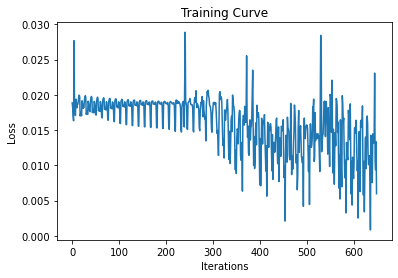

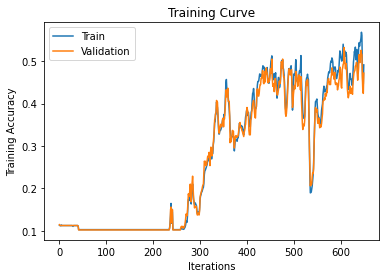

Final Training Accuracy: 0.4913971094287681
Final Validation Accuracy: 0.47193347193347196


In [ ]:
#Model 1 only used epoch 50 so the results are not good 
train(model1, train_loader,val_loader, batch_size=120, lr=0.01, num_epochs=50)

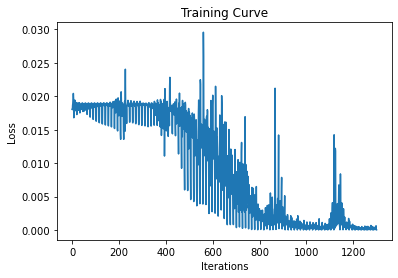

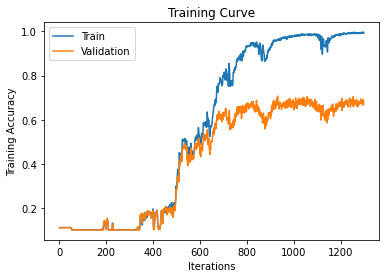

Final Training Accuracy: 0.9917412250516173
Final Validation Accuracy: 0.6715176715176715


In [ ]:
# Model2 Changing the epoch from 50 to 100 and batch as 120 and using the first archietecture with dropout 
train(model, train_loader,val_loader, batch_size=120, lr=0.01, num_epochs=100)

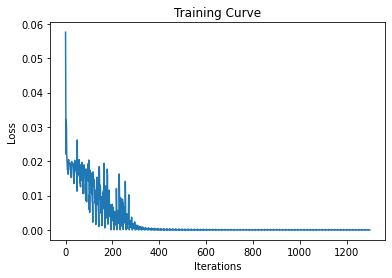

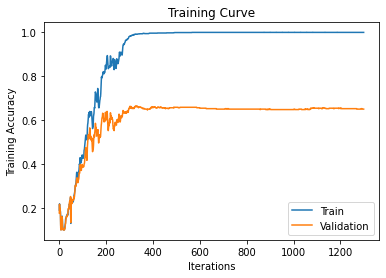

Final Training Accuracy: 0.9993117687543015
Final Validation Accuracy: 0.6507276507276507


In [ ]:
# Model3 Changing the kernel size for the model 
train(model, train_loader,val_loader, batch_size=120, lr=0.01, num_epochs=100)

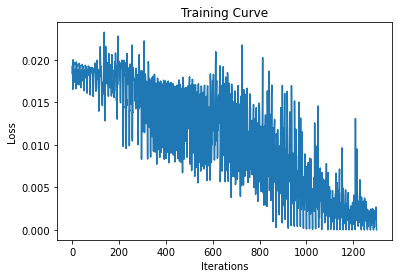

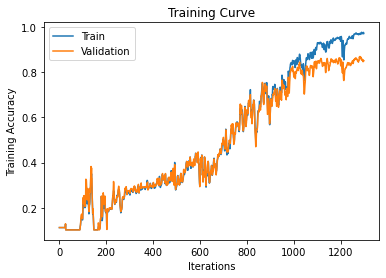

Final Training Accuracy: 0.9710942876806608
Final Validation Accuracy: 0.8503118503118503


In [ ]:
# Model 4 The best Model2 archietecture removed dropout on the first fc layer and changes kernel size
train(model1, train_loader,val_loader, batch_size=120, lr=0.01, num_epochs=100)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

**ANSWER:**

The best model is the one that was run with batch size= 120, lr=0.01, epoch=100 and it also used the Adam optimizer instead of SGD. It has 3 conv layers and 3 fc layers. The accuracy of the training data is 97% and on validation set was 85% much higher than the other models. 

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

**FINAL TEST RESULT:**

The model on the holdout/test data performed slightly worse than the validation data which was expected but it still got an acceptable 68.8% accuracy on the holdout data which means that the model is able to generalize well with unknown datasets.



In [ ]:
#Saving the best model parameters
file = 'model.pth'
torch.save(model1.state_dict(), file)

In [ ]:
#Loading the best model parameters and testing the accuracy against the holdout data
final_test_acc = [] # store the accuracy result
loaded_model = model1 
loaded_model.load_state_dict(torch.load(file)) #loading the parameters to the archietecture

#Calculating the accuracy with the testing/holdout data
final_test_acc.append(get_final_accuracy(loaded_model, test_loader))

In [ ]:
print('The accuracy on the testing/holdout data is:', final_test_acc)

[0.6116700201207244]

### Part 4. Transfer Learning [12 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 3 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexNet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# Computing the features for Training set 
features_train = []
# features_train2 = []

for imgs, labels in torch.utils.data.DataLoader(train_loader, batch_size=64):
    features_train.append(alexNet.features(imgs))
for i in features_train:
  features_train1 = torch.Tensor(i)
  # features_train2.append(features_train1.detach().numpy().reshape(-1))


In [ ]:
# Saving the training features
for i in features_train:
  features_train1 = torch.Tensor(i)
  torch.save(features_train1,'/content/drive/MyDrive/features_train.pth')
  # features_train2.append(features_train1.detach().numpy().reshape(-1))

In [ ]:
features_val = []
for imgs, labels in torch.utils.data.DataLoader(val_loader, batch_size=64):
    features_val.append(alexNet.features(imgs))

In [ ]:
# Saving the validation features
for i in features_val:
  features_val1 = torch.Tensor(i)
  torch.save(features_val1,'/content/drive/MyDrive/features_val.pth')

In [ ]:
features_test = []
for imgs, labels in torch.utils.data.DataLoader(test_loader, batch_size=64):
    features_test.append(alexNet.features(imgs))  

In [ ]:
# Saving the testing features
for i in features_test:
  features_test1 = torch.Tensor(i)
  torch.save(features_test1,'/content/drive/MyDrive/features_test.pth')

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

**MODEL ARCHIETECTURE:**

The Classifier segment has 3 fully connected layers and a dropout of 50% was applied to the first fc layer to prevent the model from overfitting. Convolutional layer was not used as the alexnet already reduces the image to 6x6. 





In [ ]:
# features = ... load precomputed alexnet.features(img) ...
# output = model(features)
# prob = F.softmax(output)

In [ ]:
#Alexnet classifier Neural Network Architecture
class AlexClassifier(nn.Module):
    def __init__(self):
        super(AlexClassifier, self).__init__()
        self.fc1 = nn.Linear(256 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 20)
        self.fc3 = nn.Linear(20, 9)
        self.dropout1 = nn.Dropout(0.5) #Dropout of 50% for preventing overfitting

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(self.dropout1(x)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Part (c) - 3 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
# tensor = torch.from_numpy(tensor.detach().numpy())
# features.append(feature.detach().numpy().reshape(-1))

In [ ]:
# Saving the model parameters and optimizers as checkpoints 
def save_checkpoint1(state, filename='my_checkpoint1.pth'):
    print('Saving checkpoint')
    torch.save(state, filename)

# Loading the saved checkpoints of the models parameters and optimizers    
def load_checkpoint1(checkpoint):
    print('Loading checkpoint')
    model.load_state_dict(checkpoint1['state_dict'])
    optimizer.load_state_dict(checkpoint1['state_dict'])

In [ ]:
# Calculating the accuracy of the model
def get_accuracy_tf(model, train_data, test_data, train=False):
    if train:
        data = train_data
    else:
        data = test_data

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        model.eval()
        imgs = alexNet.features(imgs)
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
# Calculating the final accuracy of the test/holdout data with the best model
def get_final_accuracy_tf(model, test_data):

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(test_data, batch_size=64):
        model.eval()
        imgs = alexNet.features(imgs)
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
# Training the model
def train_tf(model, data, test_data, batch_size, lr, num_epochs):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

    criterion = nn.CrossEntropyLoss() #loss function
    optimizer = optim.Adam(model.parameters(), lr=lr) #adam optimizer

    iters, losses, train_acc, val_acc = [], [], [], []
    load_model = False
    
    if load_model:
        load_checkpoint(torch.load('my_checkpoint1.pth'))

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):

        print('The epoch is:',epoch)
     # Saving for every 5 epochs
        if epoch % 5 == 0:
            checkpoint1 = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            save_checkpoint1(checkpoint1)
            load_model = True
            
        for imgs, labels in iter(train_loader):
            model.train()
            dataiter = iter(train_loader)
            images, labels = dataiter.next()
          
            # imgs = features = alexNet.features(imgs)
            features = alexNet.features(images) #SLOW
#             features.append(featurest.load_state_dict(torch.load('/content/drive/MyDrive/features_train.pth')))

            print('The iteration is',n)
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
                features = features.cuda()
                labels = labels.cuda()
            #############################################
            
              
            print(features.shape)
            output = model(features) # forward pass
            print(features.shape)
            loss = criterion(output, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()  
            print('done')       # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_tf(model, data, test_data, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy_tf(model, data, test_data, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
use_cuda = True

model2 = AlexClassifier()

if use_cuda and torch.cuda.is_available():
    model2.cuda()
    print('CUDA is available!  Training on GPU ...')
else:
    print('CUDA is not available.  Training on CPU ...')
  

CUDA is available!  Training on GPU ...


The epoch is: 0
Saving checkpoint
The iteration is 0
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 1
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 2
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 3
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 4
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 5
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The epoch is: 1
The iteration is 6
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 7
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 8
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 9
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 10
torch.Size([256, 256, 6, 6])
torch.Size([256, 256, 6, 6])
done
The iteration is 11
torch.Size([256, 256, 6, 6]

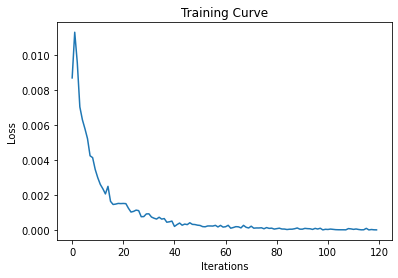

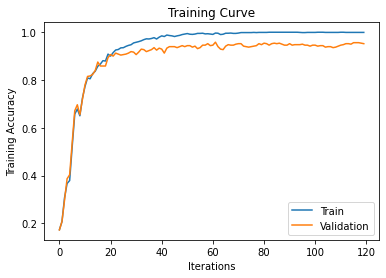

Final Training Accuracy: 0.9993117687543015
Final Validation Accuracy: 0.9521829521829522


In [ ]:
# The best model using alexnet features

train_tf(model2, train_loader, val_loader, batch_size = 256, lr = 0.01, num_epochs = 20)

### Part (d) - 3 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

**ANSWER:**

For the best model the accuracy of the training set is 99% and for the validation set is 95%. This is much higher than what was gotten before, which was 97% on training but it only got 85% on validation without transfer learning. Hence, using a pre-trained model helped getting a much better result in the image classification.



### Part 5. Testing on New Data [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

This question will also be evaluated on the overal performance achieved.

In [ ]:
# Saving the best model parameters for testing
file = 'tl_model_final.pth'
torch.save(model2.state_dict(), file)

# Loading the parameters into the archietecture for testing on holdout data
final_tl_test_acc = []
loaded_model1 = model2
loaded_model1.load_state_dict(torch.load(file))

# Calculating the accuracy of the model on the holdout data
final_tl_test_acc.append(get_final_accuracy_tf(loaded_model1, my_test_loader))

In [ ]:
print('The final Test accuracy on the holdout dataset is',final_tl_test_acc)

The final Test accuracy on the holdout dataset is [0.8888888888888888]


**RESULT:**

Now taking the best model and using the holdout data (27 images) gives an accuracy of 88.8%, which is lower than the validation score of 95%. However, it is expected as the model won't be able to get a better or similar score on an unknown dataset. That being said a 88% is really good considering the limited images used for training, proving that transfer learning can quickly speed up the process of image classification significantly even if we have limited training data. 



### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

[NbConvertApp] Converting notebook LAB_2_Hand_Gesture_Recognition.ipynb to html
[NbConvertApp] Writing 1120648 bytes to LAB_2_Hand_Gesture_Recognition.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus